## Comparisons to other methods (speed, accuracy)

### PCA

Popular linear dimensionality reduction methods include PCA, or Principal Components Analysis, and MDS, Multi-Dimensional Scaling. However, issues arise in applications where low-dimensional representations of similar points must be kept close together, because these methods prioritize keeping low-dimensional representations of dissimilar points far apart. To avoid this concern and preserve local data structures, non-linear dimensionality reduction methods have been proposed as well, one of which, Stochastic Neighbor Embedding, forms the basis of this paper. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = np.loadtxt("Data/mnist2500_X.txt")
labels = np.loadtxt("Data/mnist2500_labels.txt")

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [49]:
train = StandardScaler().fit_transform(X)
pca_res = PCA(n_components=2).fit_transform(train)

In [12]:
%timeit PCA(n_components=2).fit_transform(train)

26.5 ms ± 928 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


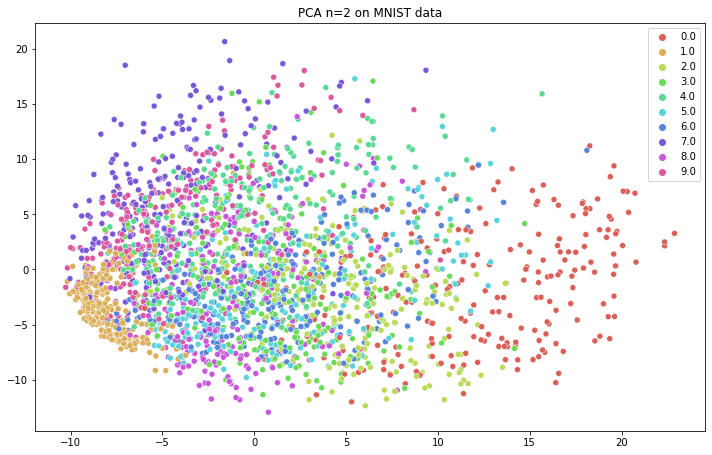

In [26]:
plt.figure(figsize=(12,7.5))
plot_PCA = sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('PCA n=2 on MNIST data')
plot_PCA.savefig("Report_Plots/PCA_MNIST_plot.png")




### Isomap

In [28]:
from sklearn.manifold import Isomap

In [50]:
iso_res = Isomap(n_components=2).fit_transform(train)

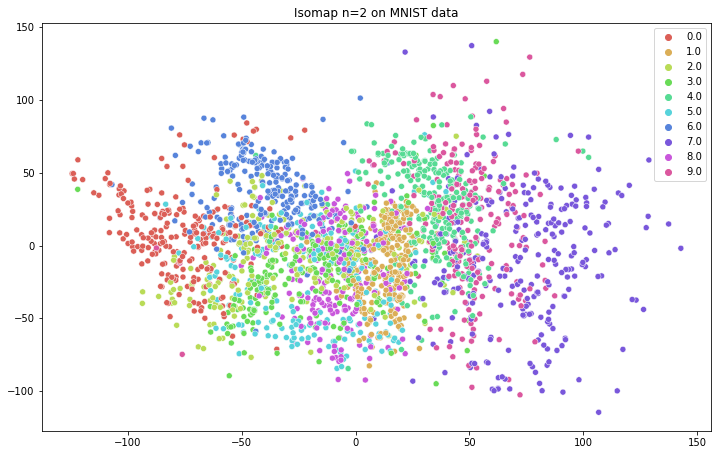

In [62]:
plt.figure(figsize=(12,7.5))
plot_iso = sns.scatterplot(x = iso_res[:,0], y = iso_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('Isomap n=2 on MNIST data')
plot_iso.savefig("Report_Plots/Isomap_MNIST_plot.png")


In [31]:
%timeit Isomap(n_neighbors = 10, n_components=2).fit_transform(train)

11.8 s ± 258 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### LLE: Local Linear Embedding

In [37]:
from sklearn.manifold import LocallyLinearEmbedding

In [60]:
lle_res = LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

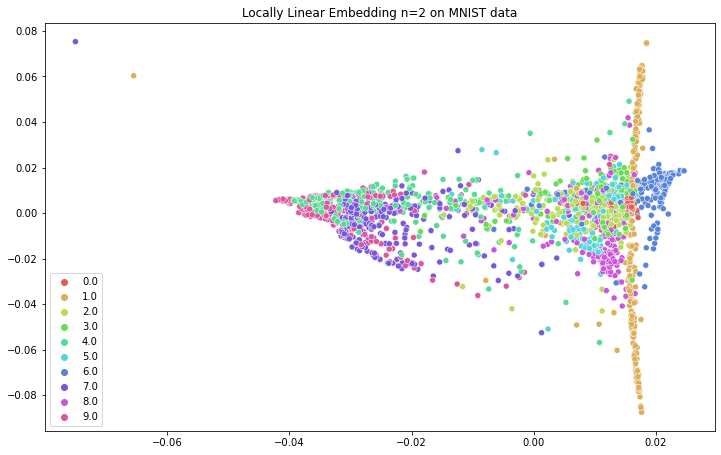

In [61]:
plt.figure(figsize=(12,7.5))
plot_lle = sns.scatterplot(x = lle_res[:,0], y = lle_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('Locally Linear Embedding n=2 on MNIST data')
plot_lle.savefig("Report_Plots/LLE_MNIST_plot.png")


In [63]:
%timeit LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

10.2 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Neighborhood Components Analysis

In [64]:
from sklearn import neighbors


In [66]:
nca_res = neighbors.NeighborhoodComponentsAnalysis(init='random',
                                               n_components=2, random_state=0).fit_transform(train, labels)


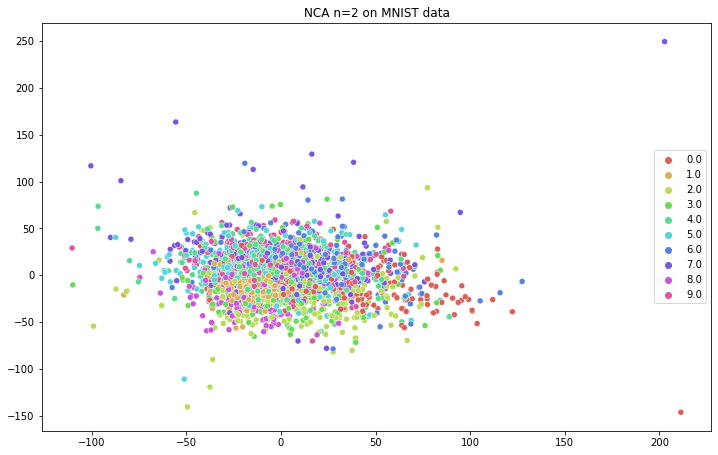

In [71]:
plt.figure(figsize=(12,7.5))
plot_nca = sns.scatterplot(x = nca_res[:,0], y = nca_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('NCA n=2 on MNIST data')
plot_nca.savefig("Report_Plots/NCA_MNIST_plot.png")

In [70]:
%timeit neighbors.NeighborhoodComponentsAnalysis(init='random', n_components=2, random_state=0).fit_transform(train, labels)


12.1 s ± 90.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### MDS

In [72]:
from sklearn.manifold import MDS

In [78]:
mds_res = MDS(n_components=2).fit_transform(train)

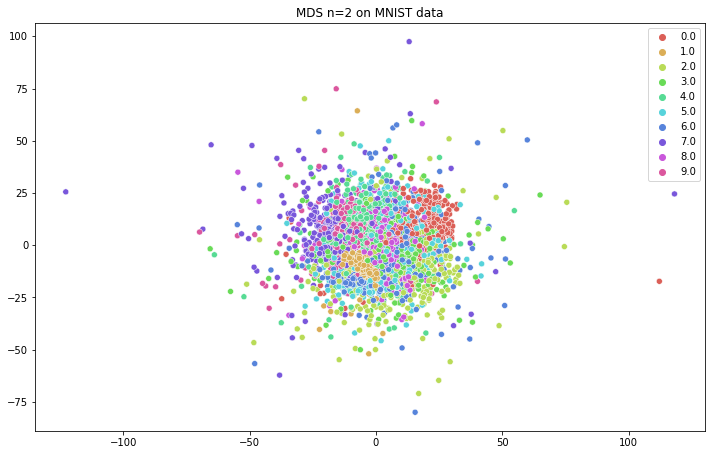

In [79]:
plt.figure(figsize=(12,7.5))
plot_mds = sns.scatterplot(x = mds_res[:,0], y = mds_res[:,1], hue = labels, palette = sns.color_palette("hls", 10), legend = 'full').get_figure()
plt.title('MDS n=2 on MNIST data')
plot_mds.savefig("Report_Plots/MDS_MNIST_plot.png")

In [81]:
%timeit MDS(n_components=2).fit_transform(train)


KeyboardInterrupt: 